In [15]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('hourly-1.csv')

dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
data = np.array(dataset)

X = data[:,2:-1]
y = data[:,-1]

y = y.reshape(-1,1)

print(X.shape, y.shape)

(17379, 14) (17379, 1)


In [18]:
from sklearn.preprocessing import normalize

X_norm = normalize(X)


In [19]:
X1 = np.concatenate((np.ones((len(X_norm),1)), X_norm),axis=1)

X1.shape

(17379, 15)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state =0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12165, 15) (12165, 1)
(5214, 15) (5214, 1)


[[0.19885185 0.68184339 0.06791915 0.64298003 0.10331185 0.34532684
  0.07334826 0.00176308 0.87862149 0.15554594 0.19126875 0.97709941
  0.37884225 0.45023478 0.16660703]]
W: [[141.5349878548534 -80.23538224344091 -18.290149910398096
  -191.019400679568 -233.03573764430274 -1.6209918249167314
  -115.7718484824381 -25.265486118512854 -61.41827999368409
  -17.041037461754232 -16.608195557447008 -27.864640473732443
  -6.786679883026498 129.50868805742633 111.15489657991812]]
MSE final Training  [[20473.138434855475]]
MSE final Testing  [[20931.727145148]]
R2 final training  0.3765678890266214
R2 final testing  0.36646651464123836


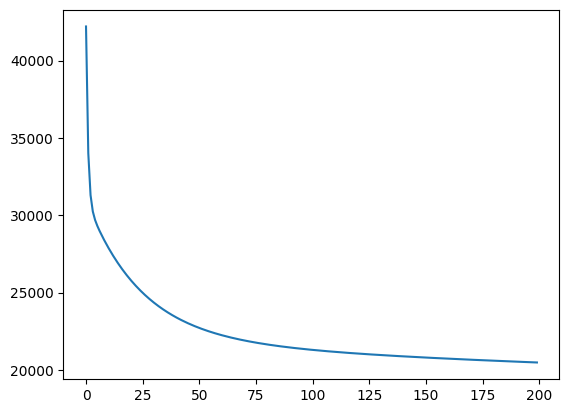

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Initialize W
m, n = np.shape(X_train)
initw = np.random.rand(1, n)
print(initw)


# Gradient function
def gradient(X, Y, W):
    residual = Y - np.dot(X, W.T)  # Salida menos predicción
    grad = -2 * np.dot(X.T, residual)
    return grad


# Cost function
def mse(Y, Yt):
    m = len(Y)
    residual = Y - Yt
    cost = (1/m) * np.dot(residual.T, residual)
    return cost


# GD Algorithm
def GD(X, Y, W, alpha, iterations):
    grad = gradient(X, Y, W)
    it = 0
    J = []
    while it < iterations:
        grad = gradient(X, Y, W)
        W = W - np.dot(alpha, grad.T)
        it += 1
        Yt = np.dot(X, W.T)
        costo = mse(Y, Yt)
        J.append(costo)
    return W, it, J


# Testing the GD
w, iterations, J = GD(X_train, y_train, initw, 0.00001, 200)
J = np.array(J)
J = J.reshape(-1, 1)
print('W:', w)
plt.plot(J)


yt = np.dot(X_train, w.T)  # Predicción de training
yt_Te = np.dot(X_test, w.T)
costoTR = mse(y_train, yt)
costoTe = mse(y_test, yt_Te)


r2_tr = r2_score(y_train, yt)
r2_te = r2_score(y_test, yt_Te)


# Crear listas para guardar valores de R2 de cada algoritmo
R2_train = []
R2_test = []


R2_train.append(r2_tr)
R2_test.append(r2_te)


print('MSE final Training ', costoTR)
print('MSE final Testing ', costoTe)
print('R2 final training ', r2_tr)
print('R2 final testing ', r2_te)


In [22]:
from sklearn.linear_model import LinearRegression

reg =  LinearRegression().fit(X_train, y_train)

cost1Tr = reg.score(X_train, y_train)
cost1Te = reg.score(X_test, y_test)

R2_train.append(cost1Tr)
R2_test.append(cost1Te)

print('Error (R2) Train', cost1Tr)
print('Error (R2) Test', cost1Te)

Error (R2) Train 0.5378835112508444
Error (R2) Test 0.5307625368622304


In [23]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor()
DT_reg = dtreg.fit(X_train, y_train)

costo2TR = DT_reg.score(X_train, y_train)
costo2Te = DT_reg.score(X_test, y_test)


R2_train.append(costo2TR)
R2_test.append(costo2Te)


print('Error (R2) Train ', costo2TR)
print('Error (R2) Test ', costo2Te)

print(R2_train, R2_test)


Error (R2) Train  1.0
Error (R2) Test  0.99315182260455
[0.3765678890266214, 0.5378835112508444, 1.0] [0.36646651464123836, 0.5307625368622304, 0.99315182260455]


<function matplotlib.pyplot.show(close=None, block=None)>

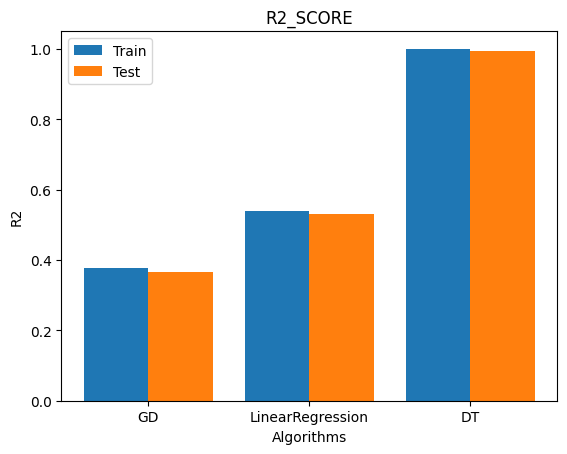

In [24]:
XX = ['GD', 'LinearRegression', 'DT']

X_axis = np.arange(len(XX))


plt.bar(X_axis - 0.2, R2_train, 0.4, label='Train')
plt.bar(X_axis + 0.2, R2_test, 0.4, label='Test')

plt.xticks(X_axis, XX)
plt.xlabel('Algorithms')
plt.ylabel('R2')
plt.title('R2_SCORE')
plt.legend()
plt.show
